# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) je statistická metoda používaná pro redukci dimenze dat při zachování co největší variability v datech. PCA je často využívána k zjednodušení dat, vizualizaci, a zlepšení výkonnosti strojového učení.

## PCA pro redukci dimenze dat

PCA transformuje data do nižší dimenze, kde osy (hlavní komponenty) jsou lineární kombinací původních příznaků a jsou navzájem dekorelované.

### Kroky PCA:
1. **Normalizace dat:** Každá proměnná má průměr 0 a rozptyl 1.
2. **Výpočet kovarianční matice:** Měří, jak se proměnné vzájemně mění.
3. **Výpočet vlastních hodnot a vlastních vektorů:** Identifikace hlavních komponent.
4. **Výběr hlavních komponent:** Vybrání komponent s nejvyšší variabilitou.
5. **Transformace dat:** Projekce původních dat na nové komponenty.

# Implementace PCA v pythonu s použitím knihovny

In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Načtení datasetu Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Převod na DataFrame jen pro zobrazení dat
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [43]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
# Normalizace dat
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [45]:
# PCA
pca = PCA(n_components=2)  # Redukce na 2 komponenty pro vizualizaci
X_pca = pca.fit_transform(X_std)

# Vysvětlená variance
explained_variance = pca.explained_variance_ratio_
print(f"Zachycená variance jednotlivých komponent: {explained_variance}")
print(f"Celková zachycená variance: {explained_variance.sum()}")

Zachycená variance jednotlivých komponent: [0.72962445 0.22850762]
Celková zachycená variance: 0.9581320720000164


Pro dekorelaci použijeme např.:

pca = PCA(n_components=0.95) # vybere počet komponent, které zachycují 95 % variance původních dat

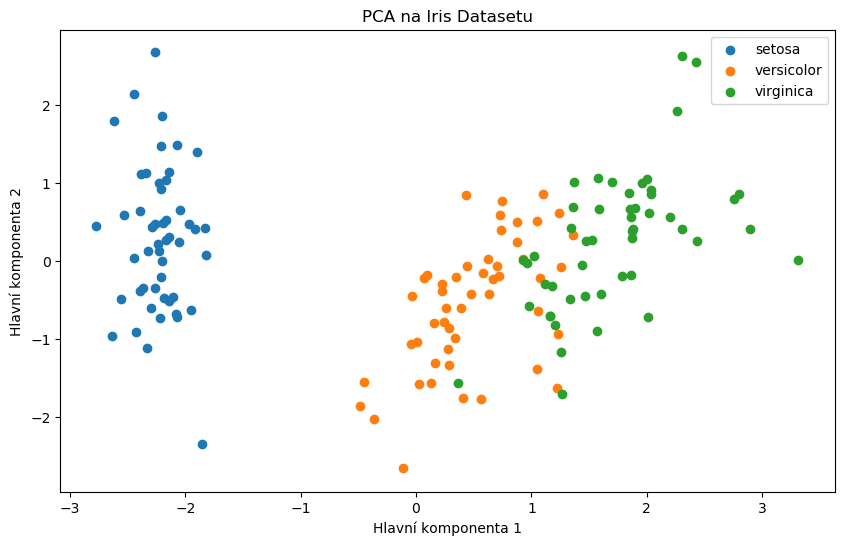

In [40]:
# Vizualizace výsledků PCA
plt.figure(figsize=(10,6))
for target in np.unique(y):
    plt.scatter(
        X_pca[y == target, 0],
        X_pca[y == target, 1],
        label=iris.target_names[target]
    )
plt.xlabel('Hlavní komponenta 1')
plt.ylabel('Hlavní komponenta 2')
plt.title('PCA na Iris Datasetu')
plt.legend()
plt.show()

## Implementace PCA bez použití knihovny

Používáme stejný dataset

### Krok 1 - normalizace dat

In [47]:
X_mean = np.mean(X, axis=0)
X_std_manual = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std_manual

### Krok 2: Výpočet kovarianční matice

Silně pozitivní nebo negativní kovariance může naznačovat redundanci mezi proměnnými, což je důležité při redukci dimenze.

In [48]:
# Kovarianční matice má rozměry (počet příznaků x počet příznaků)
covariance_matrix = np.cov(X_standardized, rowvar=False)
print("Kovarianční matice:\n", covariance_matrix)

Kovarianční matice:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


### Krok 3: Výpočet vlastních čísel a vlastních vektorů

Vlastní čísla nám říkají, kolik variability je vysvětleno každou hlavní komponentou. Vyšší vlastní číslo znamená důležitější komponentu.

Vlastní vektory představují směry (orientace) hlavních komponent v původním prostoru příznaků.

In [46]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("Vlastní čísla:\n", eigenvalues)
print("Vlastní vektory:\n", eigenvectors)

Vlastní čísla:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Vlastní vektory:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### Krok 4: Seřazení vlastních čísel a vlastních vektorů

In [33]:
sorted_idx = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_idx]
sorted_eigenvectors = eigenvectors[:, sorted_idx]
print("Seřazené vlastní čísla:\n", sorted_eigenvalues)
print("Seřazené vlastní vektory:\n", sorted_eigenvectors)

Seřazené vlastní hodnoty:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Seřazené vlastní vektory:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [34]:
# Výběr hlavních komponent
n_components = 2
principal_components = sorted_eigenvectors[:, :n_components]
print("Hlavní komponenty:\n", principal_components)

Hlavní komponenty:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


### Krok 5: Transformace dat

In [35]:
X_pca_manual = np.dot(X_standardized, principal_components)
print("Transformed Data:\n", X_pca_manual[:5]) 

Transformed Data:
 [[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


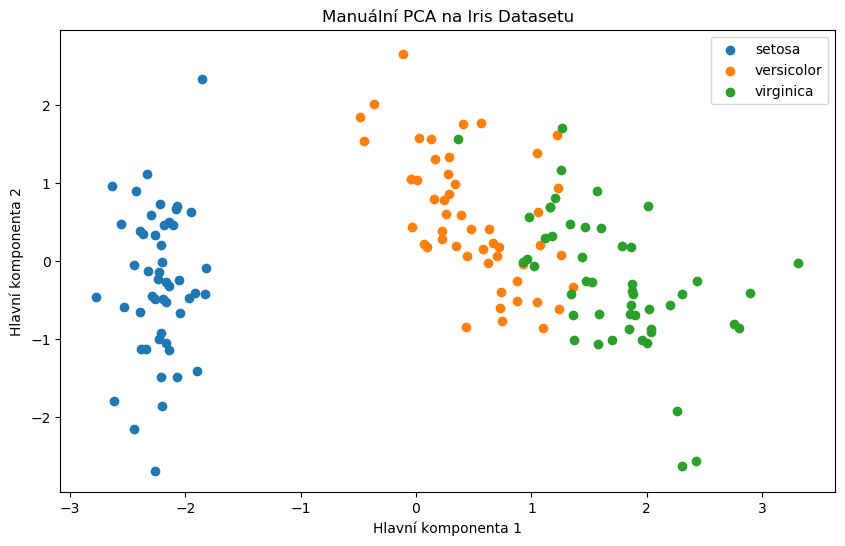

In [36]:
# Vizualizace výsledků manuální PCA
plt.figure(figsize=(10,6))
for target in np.unique(y):
    plt.scatter(
        X_pca_manual[y == target, 0],
        X_pca_manual[y == target, 1],
        label=iris.target_names[target]
    )
plt.xlabel('Hlavní komponenta 1')
plt.ylabel('Hlavní komponenta 2')
plt.title('Manuální PCA na Iris Datasetu')
plt.legend()
plt.show()

# Shrnutí a Závěr

- **PCA** je silný nástroj pro redukci dimenze, který pomáhá zjednodušit data při zachování jejich variability.
- **Dekorelace** odstraňuje závislosti mezi příznaky.
- **Omezení:** PCA nemusí dobře zachytit nelineární vztahy v datech.
- **Další metody:** Pro nelineární redukci dimenze můžete vyzkoušet metody jako t-SNE nebo LDA.

**Doporučená literatura a zdroje:**
- [Scikit-learn PCA Dokumentace](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- **Kniha:** [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf) od Christophera M. Bishopa